In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
import matplotlib.pyplot as plt

In [25]:
df=pd.read_csv('diabetes.csv')

In [26]:
df.shape

(768, 9)

In [27]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [28]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='Outcome', ylabel='count'>

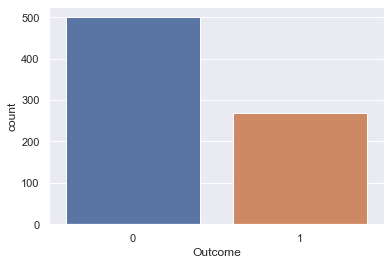

In [29]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.countplot(x=df['Outcome'])

In [30]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0--> Not a Patient of diabetes<br>
2-->Patient of diabetes<br>


In [31]:
#number of unique values in all the features 
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [32]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

<AxesSubplot:>

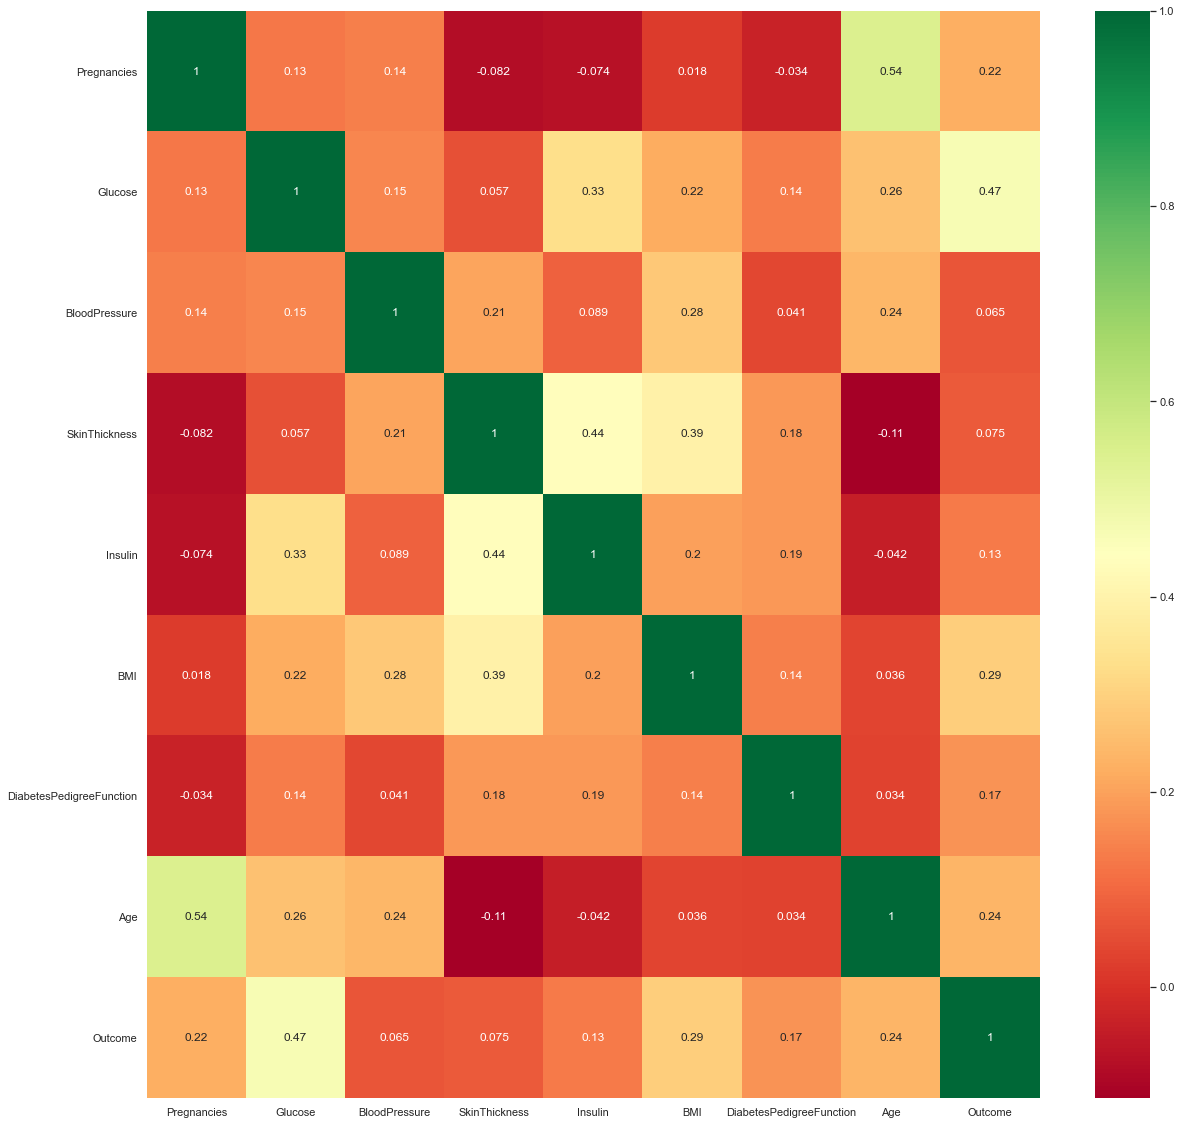

In [33]:
#finding correlation between different features 
corr_matrix=df.corr()
corr_index_features=corr_matrix.index
plt.figure(figsize=(20,20))
sns.heatmap(data=df[corr_index_features].corr(),annot=True,cmap='RdYlGn')

as one can observe from the above dataset the dataset is mostly negatively correlated 

#finding null values in the data 

In [34]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

theres are no null values in the dataset

In [35]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

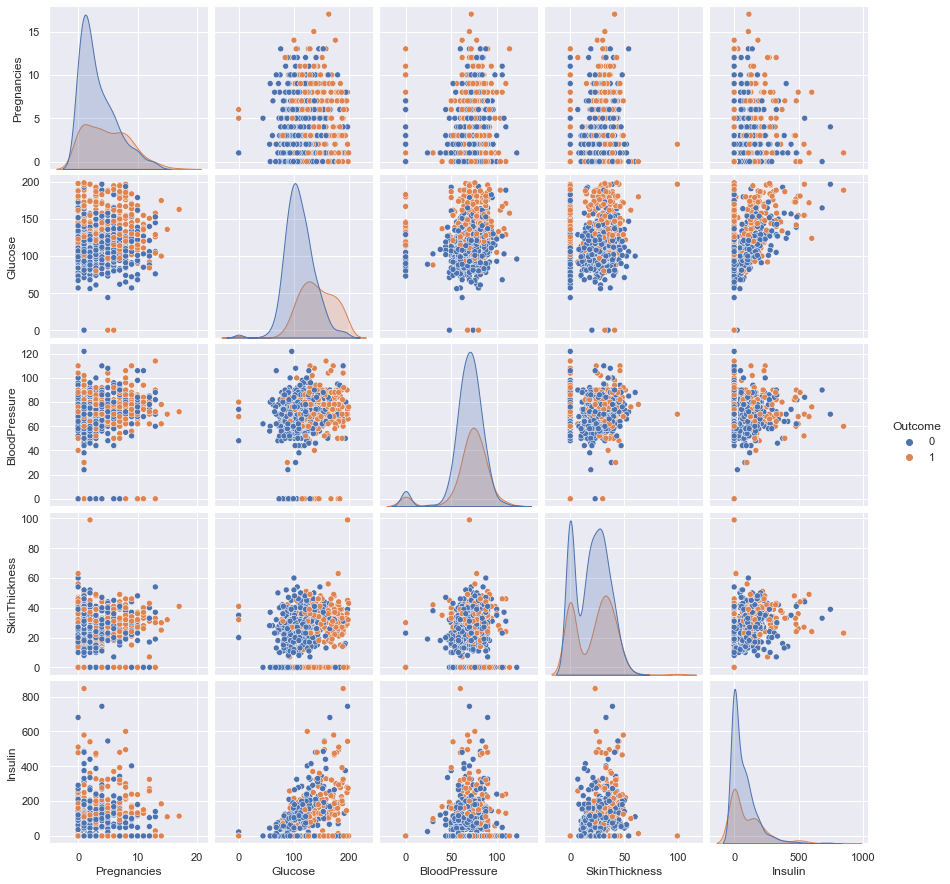

In [36]:
sns.pairplot(df, hue="Outcome", vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'])
plt.show()

In [37]:
y=df['Outcome']
df.drop(columns=['Outcome'],inplace=True)

In [38]:
print(df.shape)
print(y.shape)

(768, 8)
(768,)


## Applying machine learning algorithm on dataset 

#### 1. K- Nearest Neighbors :



In [39]:
from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()
#df=sc.fit_transform(df)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,y,stratify=y,random_state=42,test_size=0.2)

In [40]:
type(x_train)

pandas.core.frame.DataFrame

In [41]:
neighbors_score=[]
for i in range(1,21):
    kclassifier=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(kclassifier,x_train,y_train,cv=5)
    neighbors_score.append(score.mean())

In [42]:
score.mean()

0.7574037051845929

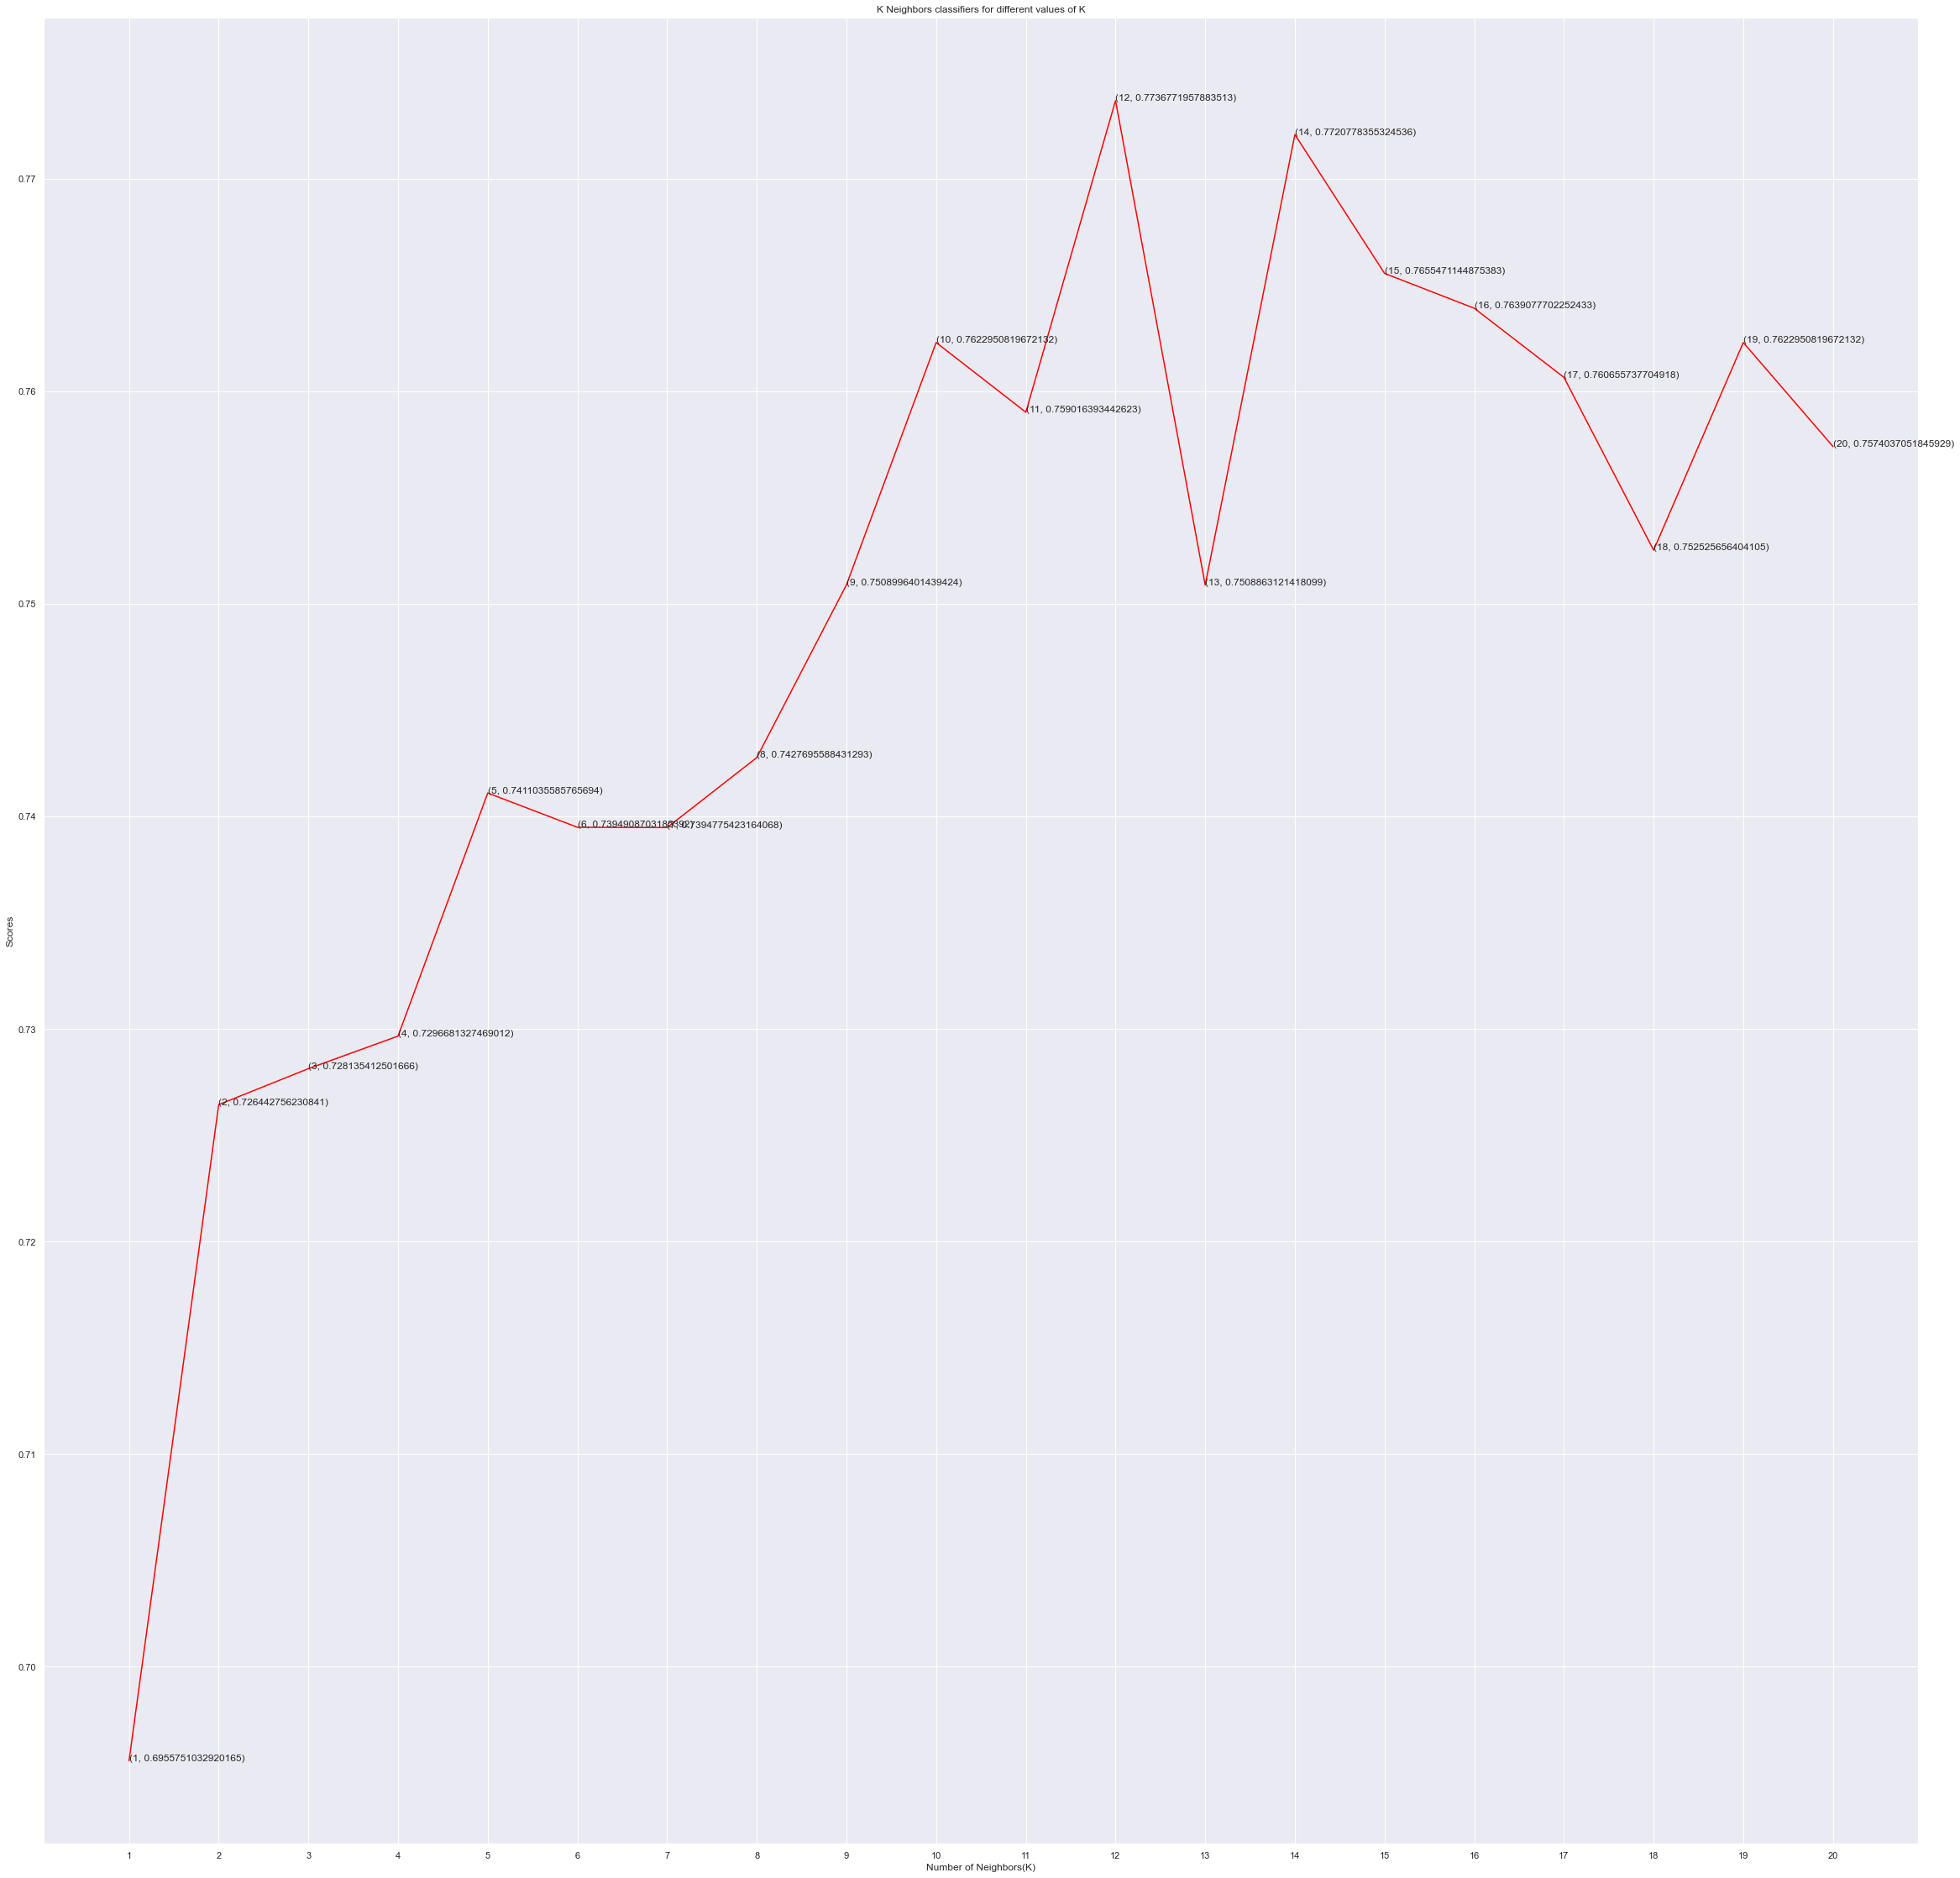

In [43]:
plt.figure(figsize=(40,40))
plt.plot([k for k in range(1,21)],neighbors_score,color='red')
for i in range(1,21):
    plt.text(i,neighbors_score[i-1],(i,neighbors_score[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('Number of Neighbors(K)')
plt.ylabel('Scores')


plt.title('K Neighbors classifiers for different values of K')
plt.savefig('KNN.png')

In [44]:
np.argmax(score)

4

we have the highest accuracy with k nearest neighbors when we have the number of neighbors equal to 4


In [46]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
score=cross_val_score(knn,x_train,y_train,cv=5)
from sklearn.metrics import accuracy_score
print("cross validation accuracy : ",score.mean())
print("testing accuracy :  ",accuracy_score(knn.predict(x_test),y_test))

cross validation accuracy :  0.7296681327469012
testing accuracy :   0.7272727272727273


In [47]:
from joblib import load, dump
dump(knn,'KNN_72.joblib')

['KNN_72.joblib']

In [48]:
pred_train_score=accuracy_score(knn.predict(x_train),y_train)
pred_test_score=accuracy_score(knn.predict(x_test),y_test)
acc=np.zeros((2,6))
acc[0][0]=pred_train_score
acc[1][0]=pred_test_score

## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train, y_train)
score=cross_val_score(log,x_train,y_train,cv=5)
print("cross validation accuracy : ",score.mean())
print("testing accuracy : ",accuracy_score(log.predict(x_test),y_test))

cross validation accuracy :  0.7703851792616286
testing accuracy :  0.7142857142857143


C:\Users\Lenovo\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

without hyperparameter tuning logistic regression is giving an accuracy of 71% lets find out accuracy after applying hyperparameter tuning 


In [50]:
logModel=LogisticRegression()

param_grid=[{'penalty':['l1','l2','elasticnet','none'],
            'C':np.logspace(-4,4,20),
            'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter':[100,1000,2500,5000]}]


Log_clf=GridSearchCV(logModel,param_grid=param_grid,cv=5,verbose=True,n_jobs=-1)
Log_best_clf=Log_clf.fit(x_train,y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 580 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 4192 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 5992 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:  1.6min finished


In [51]:
Log_best_clf.best_estimator_

LogisticRegression(C=0.08858667904100823, solver='newton-cg')

In [52]:
print("training accuracy : ",Log_best_clf.score(x_train,y_train))
print("Testing accuracy : ",accuracy_score(Log_best_clf.predict(x_test),y_test))

training accuracy :  0.7931596091205212
Testing accuracy :  0.7077922077922078


In [53]:
pred_train_score=accuracy_score(log.predict(x_train),y_train)
pred_test_score=accuracy_score(log.predict(x_test),y_test)
acc[0][1]=pred_train_score
acc[1][1]=pred_test_score
dump(log,'logistic_regression_71.joblib')

['logistic_regression_71.joblib']

## Applying Support Vector Classifier 

In [54]:
svc=SVC()
svc.fit(x_train,y_train)
score=cross_val_score(svc,x_train,y_train,cv=5)
print("cross validation accuracy : ",score.mean())
print("testing accuracy : ",accuracy_score(svc.predict(x_test),y_test))

cross validation accuracy :  0.7606690657070505
testing accuracy :  0.7207792207792207


Before applying hyperparameter tuning we have an accuracy of 69% 


In [55]:
#applying hyperparameter tuning in support vector machines :

svc_model=SVC(gamma='auto')
param_grid={'C':[0.1,1,10,100],
           'gamma':[1,0.1,0.01,0.001],
           'kernel':['rbf']}

from sklearn.model_selection import RandomizedSearchCV

SV_grid=GridSearchCV(estimator=svc_model,param_grid=param_grid,cv=5,verbose=2,n_jobs=4)


SV_grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  38 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done  73 out of  80 | elapsed:    2.8s remaining:    0.2s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:    2.8s finished


GridSearchCV(cv=5, estimator=SVC(gamma='auto'), n_jobs=4,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [56]:
SV_grid.best_params_


{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

In [57]:
print("training accuracy : ",SV_grid.score(x_train,y_train))
print("Testing accuracy : ",accuracy_score(SV_grid.predict(x_test),y_test))

training accuracy :  0.8550488599348535
Testing accuracy :  0.7012987012987013


as it can be seen when we apply hyper parameter tunning the model is clearly underfitting so we will be using the model with trainning accuracy 72% and testing accuracy 69%.


In [58]:
print("training accuracy : ",svc.score(x_train,y_train))
print("Testing accuracy : ",accuracy_score(svc.predict(x_test),y_test))
pred_train_score=accuracy_score(svc.predict(x_train),y_train)
pred_test_score=accuracy_score(svc.predict(x_test),y_test)
acc[0][2]=pred_train_score
acc[1][2]=pred_test_score

training accuracy :  0.7785016286644951
Testing accuracy :  0.7207792207792207


In [59]:
dump(svc,'Liver_SVC_72.joblib')

['Liver_SVC_72.joblib']

## Applying Decision Tree;

In [77]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
score=cross_val_score(dt,x_train,y_train,cv=5)
print("cross validation accuracy ",score.mean())
print("testing accuracy ",accuracy_score(dt.predict(x_test),y_test))

cross validation accuracy  0.6955217912834867
testing accuracy  0.7597402597402597


In [78]:
dt_model=DecisionTreeClassifier()
param_grid={'max_depth':(10,30,50,70,90,100),
           'criterion':('gini','entropy'),
           'max_depth':(3,5,7,9,10),
           'max_features':('auto','sqrt','log2'),
           'min_samples_split':(2,4,6)}
DT_grid_cv=GridSearchCV(dt_model,param_grid=param_grid,cv=5,verbose=True)
DT_grid_cv.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (3, 5, 7, 9, 10),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'min_samples_split': (2, 4, 6)},
             verbose=True)

In [79]:
print(DT_grid_cv.estimator)
print(DT_grid_cv.best_params_)

DecisionTreeClassifier()
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'min_samples_split': 6}


In [80]:
print("training accuracy :",DT_grid_cv.score(x_train,y_train))
print("testing acccuracy : ",accuracy_score(DT_grid_cv.predict(x_test),y_test))

training accuracy : 0.755700325732899
testing acccuracy :  0.7272727272727273


with hyperparamete tuning we have accuracy around 67%.

In [81]:
pred_train_score=accuracy_score(DT_grid_cv.predict(x_train),y_train)
pred_test_score=accuracy_score(DT_grid_cv.predict(x_test),y_test)
acc[0][3]=pred_train_score
acc[1][3]=pred_test_score

In [82]:
dump(DT_grid_cv,'DecisionTree_70.joblib')

['DecisionTree_70.joblib']

### Applying random Forest : 

In [83]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
score=cross_val_score(rf_model,x_train,y_train,cv=5)
print("training accuracy : ",score.mean())
print("testing acccuracy : ",accuracy_score(rf_model.predict(x_test),y_test))

training accuracy :  0.7801412768226043
testing acccuracy :  0.7337662337662337


In [84]:
#aaplying hyperparameter tuning 

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)
rf_Grid.fit(x_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  92 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 576 tasks      | elapsed:   14.9s
[Parallel(n_jobs=4)]: Done 953 out of 960 | elapsed:   24.6s remaining:    0.1s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:   24.9s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [85]:
print("training accuracy :",rf_Grid.score(x_train,y_train))
print("testing acccuracy : ",accuracy_score(rf_Grid.predict(x_test),y_test))

training accuracy : 0.8273615635179153
testing acccuracy :  0.7337662337662337


with  hyperparamete tuning we have an accuracy of 68% with us 

In [91]:
pred_train_score=rf_model.score(x_train,y_train)
pred_test_score=accuracy_score(rf_model.predict(x_test),y_test)
acc[0][4]=pred_train_score
acc[1][4]=pred_test_score

In [87]:
dump(rf_model,'Random_forest_74.joblib')

['Random_forest_74.joblib']

## Naive Bayes 

In [88]:
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(x_train,y_train)
scores = cross_val_score(clf, x_train, y_train, cv=10)
print("training accuracy with Naive Bayes  : ",scores.mean())
print("testing Accuracy with Nayive Bayes: ", accuracy_score(clf.predict(x_test),y_test))

training accuracy with Naive Bayes  :  0.7639344262295081
testing Accuracy with Nayive Bayes:  0.7077922077922078


In [72]:
pred_train_score=accuracy_score(clf.predict(x_train),y_train)
pred_test_score=accuracy_score(clf.predict(x_test),y_test)
acc[0][5]=pred_train_score
acc[1][5]=pred_test_score

In [73]:
dump(clf,'Naive_70.joblib')

['Naive_70.joblib']

In [148]:
new_acc=np.zeros((2,6))
for i in range(0,6):
    new_acc[0][i]=acc[0][i]
    new_acc[1][i]=acc[1][i]
    

In [150]:
acc=new_acc

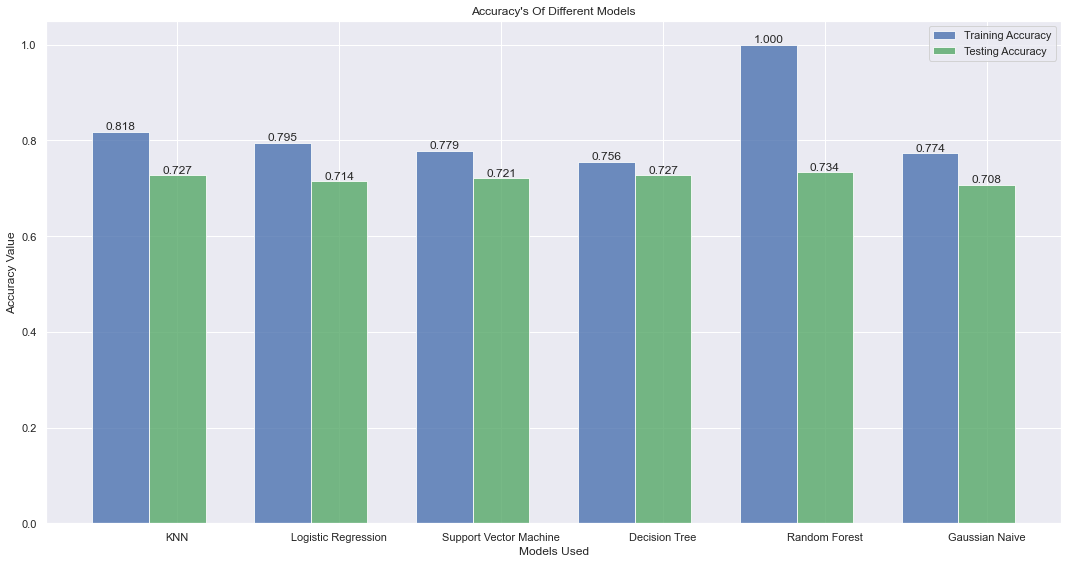

<Figure size 432x288 with 0 Axes>

In [92]:
n_groups = 6
acc_trn = acc[0]
acc_tst = acc[1]

# create plot
plt.figure(figsize=(15,8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
def display_percentage(bars):
    for graph in bars:
        height = graph.get_height()
        plt.text(graph.get_x() + graph.get_width()/2., height,'%.3f' %float(round(height,3)),ha='center', va='bottom')

train_bar = plt.bar(index, acc_trn, bar_width,alpha=opacity,color='b',label='Training Accuracy')
display_percentage(train_bar)

test_bar = plt.bar(index + bar_width, acc_tst, bar_width,alpha=opacity,color='g',label='Testing Accuracy')
display_percentage(test_bar)
plt.xticks(index + bar_width, ('KNN','Logistic Regression', 'Support Vector Machine', 'Decision Tree','Random Forest','Gaussian Naive'))

plt.xlabel('Models Used')
plt.ylabel('Accuracy Value')
plt.title("Accuracy's Of Different Models")
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('Accuracy.jpg')

Above figure shows different accuracy bars for differnt algorithms 